In [57]:
import pandas as pd
import numpy as np

In [58]:
#Load data and split by city
data = pd.read_csv('merged_with_property.csv', low_memory=False)
data = data.drop(['neighbourhood_group_cleansed', 'neighbourhood', "property_type_original", "host_has_profile_pic"], axis=1)
data = data.dropna(subset=['price_local'])
data_without_na = data.dropna()
dk_data = data[data['city'] == 'Copenhagen'].copy()
no_data = data[data['city'] == 'Oslo'].copy()

print("="*80)
print("MISSING VALUE ANALYSIS BY CITY")
print("="*80)
print(f"\nCopenhagen data: {len(dk_data)} rows")
print(f"Oslo data: {len(no_data)} rows")
print(f"Total: {len(data)} rows")

MISSING VALUE ANALYSIS BY CITY

Copenhagen data: 13831 rows
Oslo data: 8701 rows
Total: 22534 rows


In [59]:
dk_data

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_to_center_km,city,property_type_grouped,property_privacy_level,property_category
0,within a few hours,100%,50%,f,1.0,1.0,t,Vesterbro-Kongens Enghave,55.670230,12.555040,...,1.0,1.0,0.0,0.0,0.15,1.06,Copenhagen,Entire Standard,Entire,Standard
2,within an hour,100%,100%,t,3.0,4.0,t,Vesterbro-Kongens Enghave,55.672638,12.552493,...,2.0,1.0,1.0,0.0,0.47,1.06,Copenhagen,Entire Standard,Entire,Standard
3,NaN,NaN,NaN,f,1.0,1.0,t,Østerbro,55.711760,12.570910,...,1.0,1.0,0.0,0.0,0.04,3.97,Copenhagen,Entire Standard,Entire,Standard
4,within an hour,100%,100%,t,1.0,4.0,t,Indre By,55.684288,12.573019,...,1.0,1.0,0.0,0.0,0.20,0.96,Copenhagen,Entire Standard,Entire,Standard
5,within an hour,100%,63%,f,1.0,1.0,t,Amager Vest,55.665070,12.583150,...,1.0,1.0,0.0,0.0,0.65,1.54,Copenhagen,Entire Standard,Entire,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22679,NaN,NaN,NaN,f,1.0,1.0,f,Frederiksberg,55.673197,12.540398,...,1.0,1.0,0.0,0.0,NaN,1.78,Copenhagen,Entire Standard,Entire,Standard
22680,NaN,NaN,NaN,f,NaN,NaN,NaN,Østerbro,55.698504,12.587322,...,1.0,1.0,0.0,0.0,NaN,2.76,Copenhagen,Entire Standard,Entire,Standard
22681,NaN,NaN,42%,f,1.0,2.0,f,Indre By,55.671200,12.587200,...,1.0,1.0,0.0,0.0,NaN,1.30,Copenhagen,Entire Standard,Entire,Standard
22682,within a few hours,83%,25%,f,1.0,1.0,f,Vesterbro-Kongens Enghave,55.668820,12.547970,...,1.0,1.0,0.0,0.0,NaN,1.51,Copenhagen,Entire Standard,Entire,Standard


In [60]:
# Calculate missing values for each city
dk_missing = dk_data.isnull().sum()
dk_missing_pct = (dk_missing / len(dk_data) * 100).round(2)

no_missing = no_data.isnull().sum()
no_missing_pct = (no_missing / len(no_data) * 100).round(2)

# Create comparison dataframe
missing_comparison = pd.DataFrame({
    'Copenhagen_Count': dk_missing,
    'Copenhagen_Pct': dk_missing_pct,
    'Oslo_Count': no_missing,
    'Oslo_Pct': no_missing_pct
})

# Only show columns with at least some missing values
missing_comparison = missing_comparison[
    (missing_comparison['Copenhagen_Count'] > 0) | 
    (missing_comparison['Oslo_Count'] > 0)
].sort_values('Copenhagen_Count', ascending=False)

print("\nMissing Values Comparison (Copenhagen vs Oslo):")
print("="*80)
print(missing_comparison.to_string())


Missing Values Comparison (Copenhagen vs Oslo):
                             Copenhagen_Count  Copenhagen_Pct  Oslo_Count  Oslo_Pct
review_scores_location                   2251           16.28        1471     16.91
reviews_per_month                        2250           16.27        1471     16.91
review_scores_value                      2250           16.27        1471     16.91
review_scores_communication              2250           16.27        1471     16.91
review_scores_checkin                    2250           16.27        1471     16.91
review_scores_cleanliness                2250           16.27        1471     16.91
review_scores_accuracy                   2250           16.27        1471     16.91
review_scores_rating                     2250           16.27        1471     16.91
host_response_rate                       1923           13.90        1444     16.60
host_response_time                       1923           13.90        1444     16.60
host_acceptance_rate       

In [61]:
# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nCopenhagen (DK) Data:")
print(f"  Total columns: {len(dk_data.columns)}")
print(f"  Columns with missing values: {(dk_missing > 0).sum()}")
print(f"  Columns with >50% missing: {(dk_missing_pct > 50).sum()}")
print(f"  Columns with >90% missing: {(dk_missing_pct > 90).sum()}")
print(f"  Total missing values: {dk_missing.sum():,}")
print(f"  Overall missing percentage: {(dk_missing.sum() / (len(dk_data) * len(dk_data.columns)) * 100):.2f}%")

print(f"\nOslo (NO) Data:")
print(f"  Total columns: {len(no_data.columns)}")
print(f"  Columns with missing values: {(no_missing > 0).sum()}")
print(f"  Columns with >50% missing: {(no_missing_pct > 50).sum()}")
print(f"  Columns with >90% missing: {(no_missing_pct > 90).sum()}")
print(f"  Total missing values: {no_missing.sum():,}")
print(f"  Overall missing percentage: {(no_missing.sum() / (len(no_data) * len(no_data.columns)) * 100):.2f}%")



SUMMARY STATISTICS

Copenhagen (DK) Data:
  Total columns: 56
  Columns with missing values: 24
  Columns with >50% missing: 0
  Columns with >90% missing: 0
  Total missing values: 24,634
  Overall missing percentage: 3.18%

Oslo (NO) Data:
  Total columns: 56
  Columns with missing values: 23
  Columns with >50% missing: 0
  Columns with >90% missing: 0
  Total missing values: 15,719
  Overall missing percentage: 3.23%


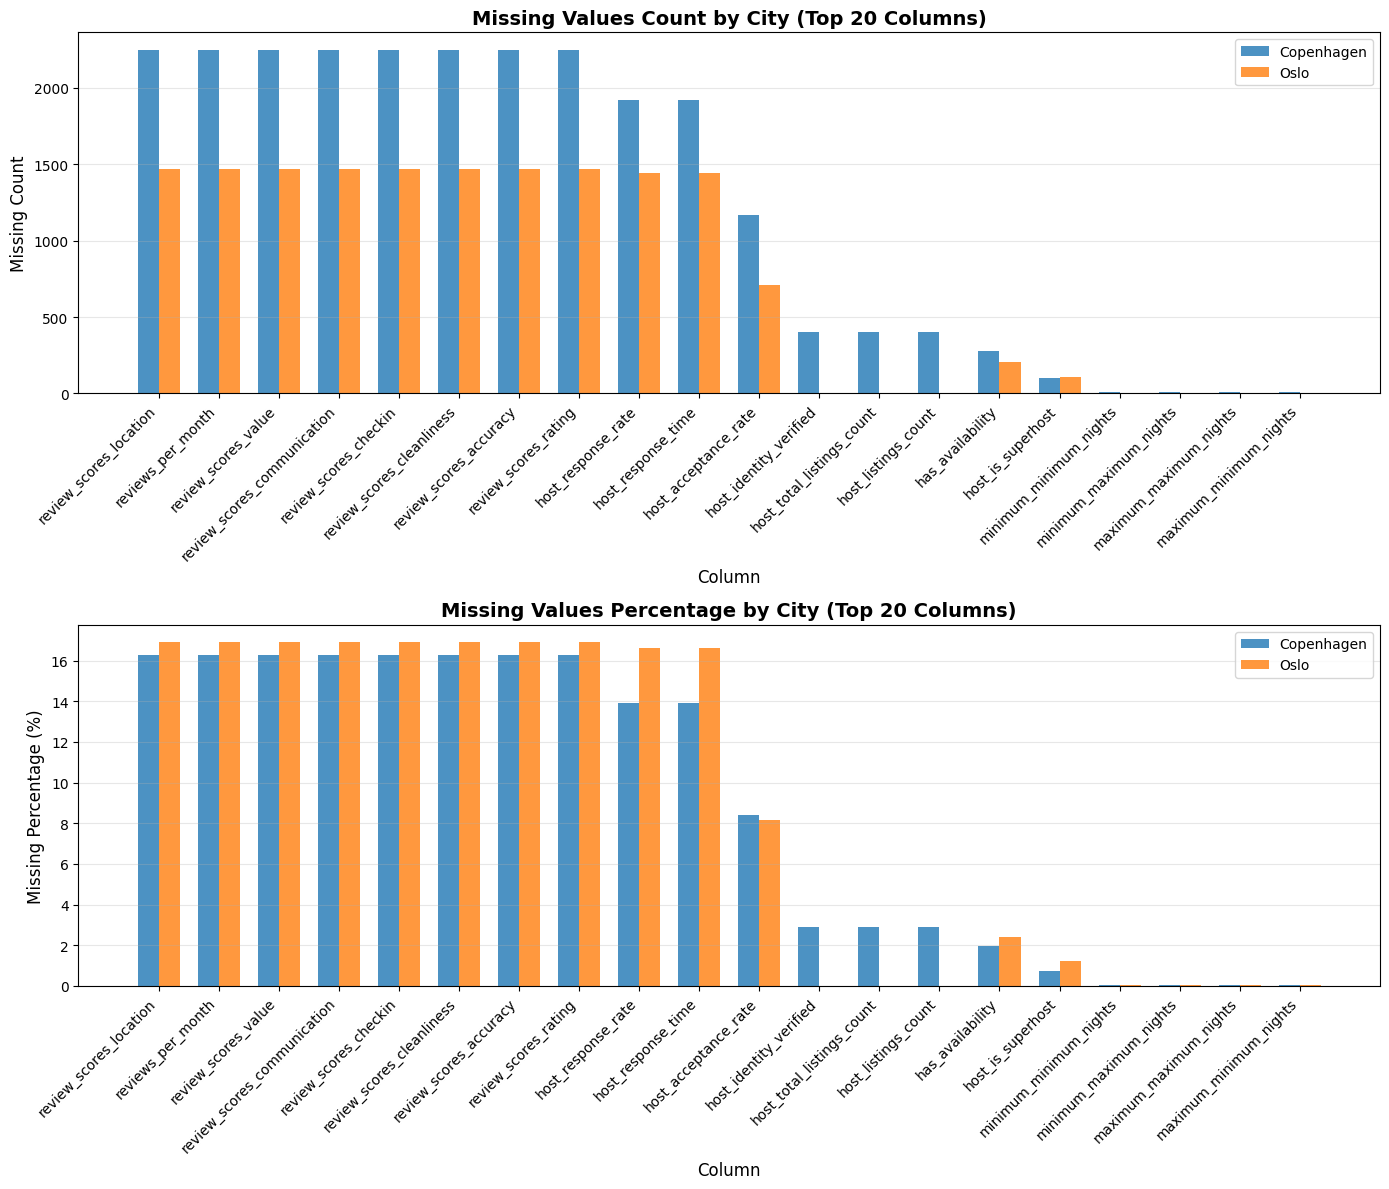

In [62]:
# Visualize missing values comparison
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Top plot: Missing counts
top_cols = missing_comparison.head(20).index
x_pos = np.arange(len(top_cols))
width = 0.35

axes[0].bar(x_pos - width/2, missing_comparison.loc[top_cols, 'Copenhagen_Count'], 
            width, label='Copenhagen', alpha=0.8, color='#1f77b4')
axes[0].bar(x_pos + width/2, missing_comparison.loc[top_cols, 'Oslo_Count'], 
            width, label='Oslo', alpha=0.8, color='#ff7f0e')
axes[0].set_xlabel('Column', fontsize=12)
axes[0].set_ylabel('Missing Count', fontsize=12)
axes[0].set_title('Missing Values Count by City (Top 20 Columns)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(top_cols, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Bottom plot: Missing percentages
axes[1].bar(x_pos - width/2, missing_comparison.loc[top_cols, 'Copenhagen_Pct'], 
            width, label='Copenhagen', alpha=0.8, color='#1f77b4')
axes[1].bar(x_pos + width/2, missing_comparison.loc[top_cols, 'Oslo_Pct'], 
            width, label='Oslo', alpha=0.8, color='#ff7f0e')
axes[1].set_xlabel('Column', fontsize=12)
axes[1].set_ylabel('Missing Percentage (%)', fontsize=12)
axes[1].set_title('Missing Values Percentage by City (Top 20 Columns)', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(top_cols, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


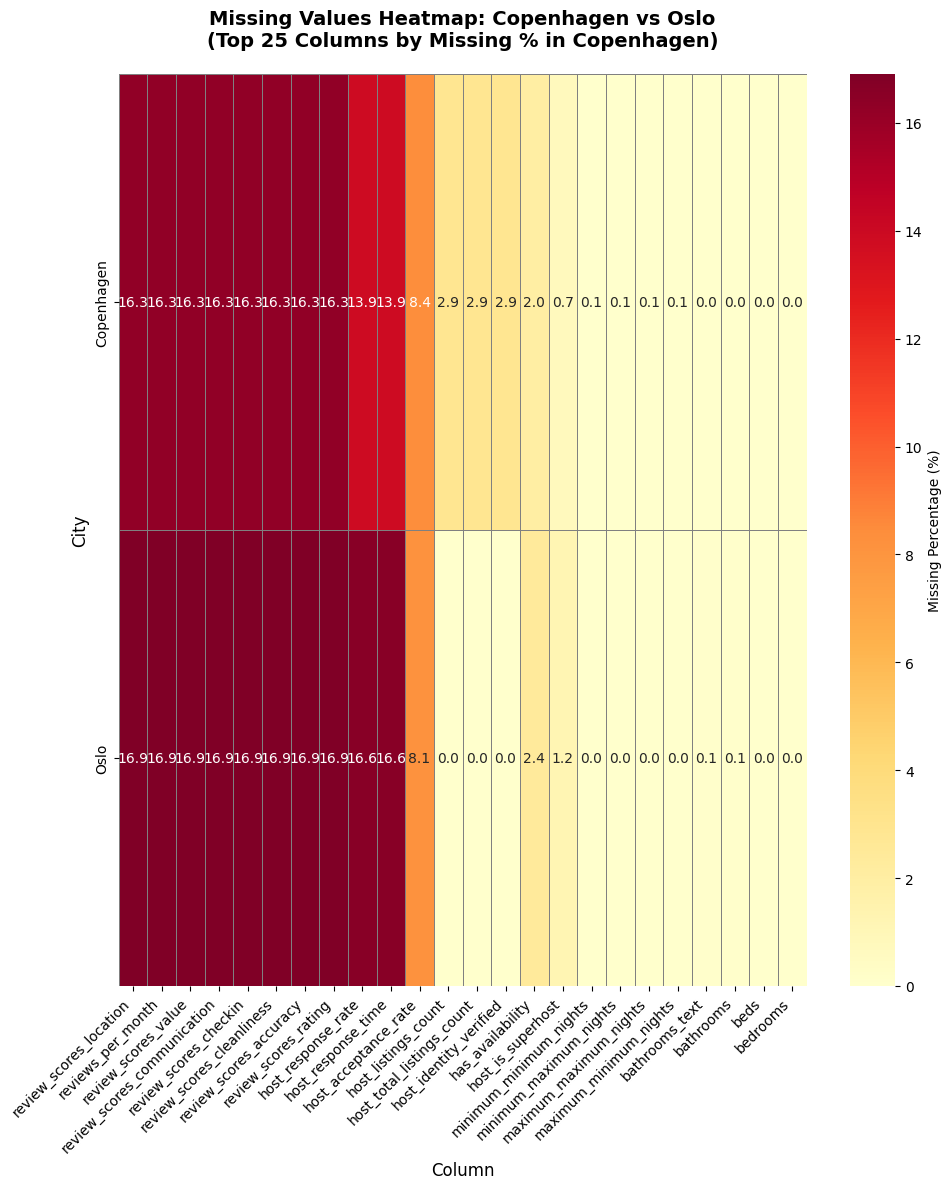

In [63]:
# Heatmap of missing values by city
missing_matrix = pd.DataFrame({
    'Copenhagen': missing_comparison['Copenhagen_Pct'],
    'Oslo': missing_comparison['Oslo_Pct']
}, index=missing_comparison.index)

# Sort by Copenhagen missing percentage
missing_matrix = missing_matrix.sort_values('Copenhagen', ascending=False).head(25)

plt.figure(figsize=(10, 12))
sns.heatmap(missing_matrix.T, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Missing Percentage (%)'}, 
            linewidths=0.5, linecolor='gray')
plt.title('Missing Values Heatmap: Copenhagen vs Oslo\n(Top 25 Columns by Missing % in Copenhagen)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Column', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [64]:
# Check if the same entries (rows) are missing the same data points
# This analyzes co-occurrence of missing values - do rows missing one column also miss others?

print("="*80)
print("MISSING VALUE CO-OCCURRENCE ANALYSIS")
print("="*80)

# Create binary missing indicators (1 = missing, 0 = present)
dk_missing_matrix = dk_data.isnull().astype(int)
no_missing_matrix = no_data.isnull().astype(int)

# Count how many rows have missing values in each column
print("\n1. Rows with missing values per column:")
print("-" * 80)
print(f"Copenhagen: {dk_missing_matrix.sum().sum():,} total missing values across {len(dk_data)} rows")
print(f"Oslo: {no_missing_matrix.sum().sum():,} total missing values across {len(no_data)} rows")

MISSING VALUE CO-OCCURRENCE ANALYSIS

1. Rows with missing values per column:
--------------------------------------------------------------------------------
Copenhagen: 24,634 total missing values across 13831 rows
Oslo: 15,719 total missing values across 8701 rows


In [65]:
# Check co-occurrence: if a row is missing column A, is it also missing column B?
# Focus on columns with significant missing values

# Get columns with >5% missing in either city
significant_missing_cols = missing_comparison[
    (missing_comparison['Copenhagen_Pct'] > 5) | (missing_comparison['Oslo_Pct'] > 5)
].index.tolist()

print(f"\n2. Analyzing co-occurrence for {len(significant_missing_cols)} columns with >5% missing:")
print("-" * 80)

# For Copenhagen
print("\nCopenhagen - Co-occurrence matrix (if row missing column A, % also missing column B):")
dk_cooccurrence = {}
for col1 in significant_missing_cols[:10]:  # Limit to top 10 for readability
    if dk_missing_matrix[col1].sum() > 0:
        dk_cooccurrence[col1] = {}
        for col2 in significant_missing_cols[:10]:
            if col1 != col2 and dk_missing_matrix[col2].sum() > 0:
                # Of rows missing col1, how many also miss col2?
                rows_missing_col1 = dk_missing_matrix[col1] == 1
                rows_missing_both = (dk_missing_matrix[col1] == 1) & (dk_missing_matrix[col2] == 1)
                if rows_missing_col1.sum() > 0:
                    pct = (rows_missing_both.sum() / rows_missing_col1.sum() * 100)
                    dk_cooccurrence[col1][col2] = pct

dk_cooccurrence_df = pd.DataFrame(dk_cooccurrence).T.round(1)
print(dk_cooccurrence_df.to_string())



2. Analyzing co-occurrence for 11 columns with >5% missing:
--------------------------------------------------------------------------------

Copenhagen - Co-occurrence matrix (if row missing column A, % also missing column B):
                             reviews_per_month  review_scores_value  review_scores_communication  review_scores_checkin  review_scores_cleanliness  review_scores_accuracy  review_scores_rating  host_response_rate  host_response_time  review_scores_location
review_scores_location                   100.0                100.0                        100.0                  100.0                      100.0                   100.0                 100.0                20.5                20.5                     NaN
reviews_per_month                          NaN                100.0                        100.0                  100.0                      100.0                   100.0                 100.0                20.5                20.5                   100.0


In [66]:
# Check if rows missing multiple values tend to be the same rows
# Count how many missing values each row has
dk_data['num_missing'] = dk_data.isnull().sum(axis=1)
no_data['num_missing'] = no_data.isnull().sum(axis=1)

print("\n3. Distribution of missing values per row:")
print("-" * 80)
print("\nCopenhagen:")
print(dk_data['num_missing'].describe())
print(f"\nRows with 0 missing: {(dk_data['num_missing'] == 0).sum():,} ({(dk_data['num_missing'] == 0).sum() / len(dk_data) * 100:.1f}%)")
print(f"Rows with 1-5 missing: {((dk_data['num_missing'] >= 1) & (dk_data['num_missing'] <= 5)).sum():,}")
print(f"Rows with 6-10 missing: {((dk_data['num_missing'] >= 6) & (dk_data['num_missing'] <= 10)).sum():,}")
print(f"Rows with >10 missing: {(dk_data['num_missing'] > 10).sum():,}")

print("\nOslo:")
print(no_data['num_missing'].describe())
print(f"\nRows with 0 missing: {(no_data['num_missing'] == 0).sum():,} ({(no_data['num_missing'] == 0).sum() / len(no_data) * 100:.1f}%)")
print(f"Rows with 1-5 missing: {((no_data['num_missing'] >= 1) & (no_data['num_missing'] <= 5)).sum():,}")
print(f"Rows with 6-10 missing: {((no_data['num_missing'] >= 6) & (no_data['num_missing'] <= 10)).sum():,}")
print(f"Rows with >10 missing: {(no_data['num_missing'] > 10).sum():,}")



3. Distribution of missing values per row:
--------------------------------------------------------------------------------

Copenhagen:
count    13831.000000
mean         1.781072
std          3.342414
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         15.000000
Name: num_missing, dtype: float64

Rows with 0 missing: 10,001 (72.3%)
Rows with 1-5 missing: 1,240
Rows with 6-10 missing: 2,224
Rows with >10 missing: 366

Oslo:
count    8701.000000
mean        1.806574
std         3.450828
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        14.000000
Name: num_missing, dtype: float64

Rows with 0 missing: 6,199 (71.2%)
Rows with 1-5 missing: 1,028
Rows with 6-10 missing: 1,100
Rows with >10 missing: 374


In [68]:
# Check specific patterns: Do rows missing review scores also miss other things?
# Focus on review scores since they seem to have similar missing patterns

review_cols = [col for col in dk_data.columns if 'review_' in col.lower()]

print("\n4. Review scores missing pattern:")
print("-" * 80)

# Check if rows missing one review score are missing all review scores
for city_name, city_data, city_missing in [('Copenhagen', dk_data, dk_missing_matrix), 
                                          ('Oslo', no_data, no_missing_matrix)]:
    print(f"\n{city_name}:")
    if len(review_cols) > 0:
        # Rows missing any review score
        missing_any_review = city_missing[review_cols].sum(axis=1) > 0
        # Rows missing all review scores
        missing_all_reviews = city_missing[review_cols].sum(axis=1) == len(review_cols)
        
        print(f"  Rows missing at least one review score: {missing_any_review.sum():,}")
        print(f"  Rows missing ALL review scores: {missing_all_reviews.sum():,}")
        if missing_any_review.sum() > 0:
            print(f"  Of rows missing any review, {missing_all_reviews.sum() / missing_any_review.sum() * 100:.1f}% are missing ALL reviews")



4. Review scores missing pattern:
--------------------------------------------------------------------------------

Copenhagen:
  Rows missing at least one review score: 2,251
  Rows missing ALL review scores: 2,250
  Of rows missing any review, 100.0% are missing ALL reviews

Oslo:
  Rows missing at least one review score: 1,471
  Rows missing ALL review scores: 1,471
  Of rows missing any review, 100.0% are missing ALL reviews


In [69]:
# Check correlation of missingness patterns
# Do certain columns tend to be missing together?

print("\n5. Missingness correlation analysis:")
print("-" * 80)
print("(High correlation = columns tend to be missing together)")

# Calculate correlation of missing indicators
dk_missing_corr = dk_missing_matrix[significant_missing_cols].corr()
no_missing_corr = no_missing_matrix[significant_missing_cols].corr()

# Find pairs with high correlation (>0.7)
print("\nCopenhagen - Column pairs with >0.7 correlation in missingness:")
dk_high_corr_pairs = []
for i in range(len(dk_missing_corr.columns)):
    for j in range(i+1, len(dk_missing_corr.columns)):
        corr_val = dk_missing_corr.iloc[i, j]
        if corr_val > 0.7:
            col1 = dk_missing_corr.columns[i]
            col2 = dk_missing_corr.columns[j]
            dk_high_corr_pairs.append((col1, col2, corr_val))

if dk_high_corr_pairs:
    for col1, col2, corr in sorted(dk_high_corr_pairs, key=lambda x: x[2], reverse=True):
        print(f"  {col1:30} <-> {col2:30} : {corr:.3f}")
else:
    print("  No pairs found with correlation >0.7")

print("\nOslo - Column pairs with >0.7 correlation in missingness:")
no_high_corr_pairs = []
for i in range(len(no_missing_corr.columns)):
    for j in range(i+1, len(no_missing_corr.columns)):
        corr_val = no_missing_corr.iloc[i, j]
        if corr_val > 0.7:
            col1 = no_missing_corr.columns[i]
            col2 = no_missing_corr.columns[j]
            no_high_corr_pairs.append((col1, col2, corr_val))

if no_high_corr_pairs:
    for col1, col2, corr in sorted(no_high_corr_pairs, key=lambda x: x[2], reverse=True):
        print(f"  {col1:30} <-> {col2:30} : {corr:.3f}")
else:
    print("  No pairs found with correlation >0.7")



5. Missingness correlation analysis:
--------------------------------------------------------------------------------
(High correlation = columns tend to be missing together)

Copenhagen - Column pairs with >0.7 correlation in missingness:
  reviews_per_month              <-> review_scores_value            : 1.000
  reviews_per_month              <-> review_scores_communication    : 1.000
  reviews_per_month              <-> review_scores_checkin          : 1.000
  reviews_per_month              <-> review_scores_cleanliness      : 1.000
  reviews_per_month              <-> review_scores_accuracy         : 1.000
  reviews_per_month              <-> review_scores_rating           : 1.000
  review_scores_value            <-> review_scores_communication    : 1.000
  review_scores_value            <-> review_scores_checkin          : 1.000
  review_scores_value            <-> review_scores_cleanliness      : 1.000
  review_scores_value            <-> review_scores_accuracy         : 1.000

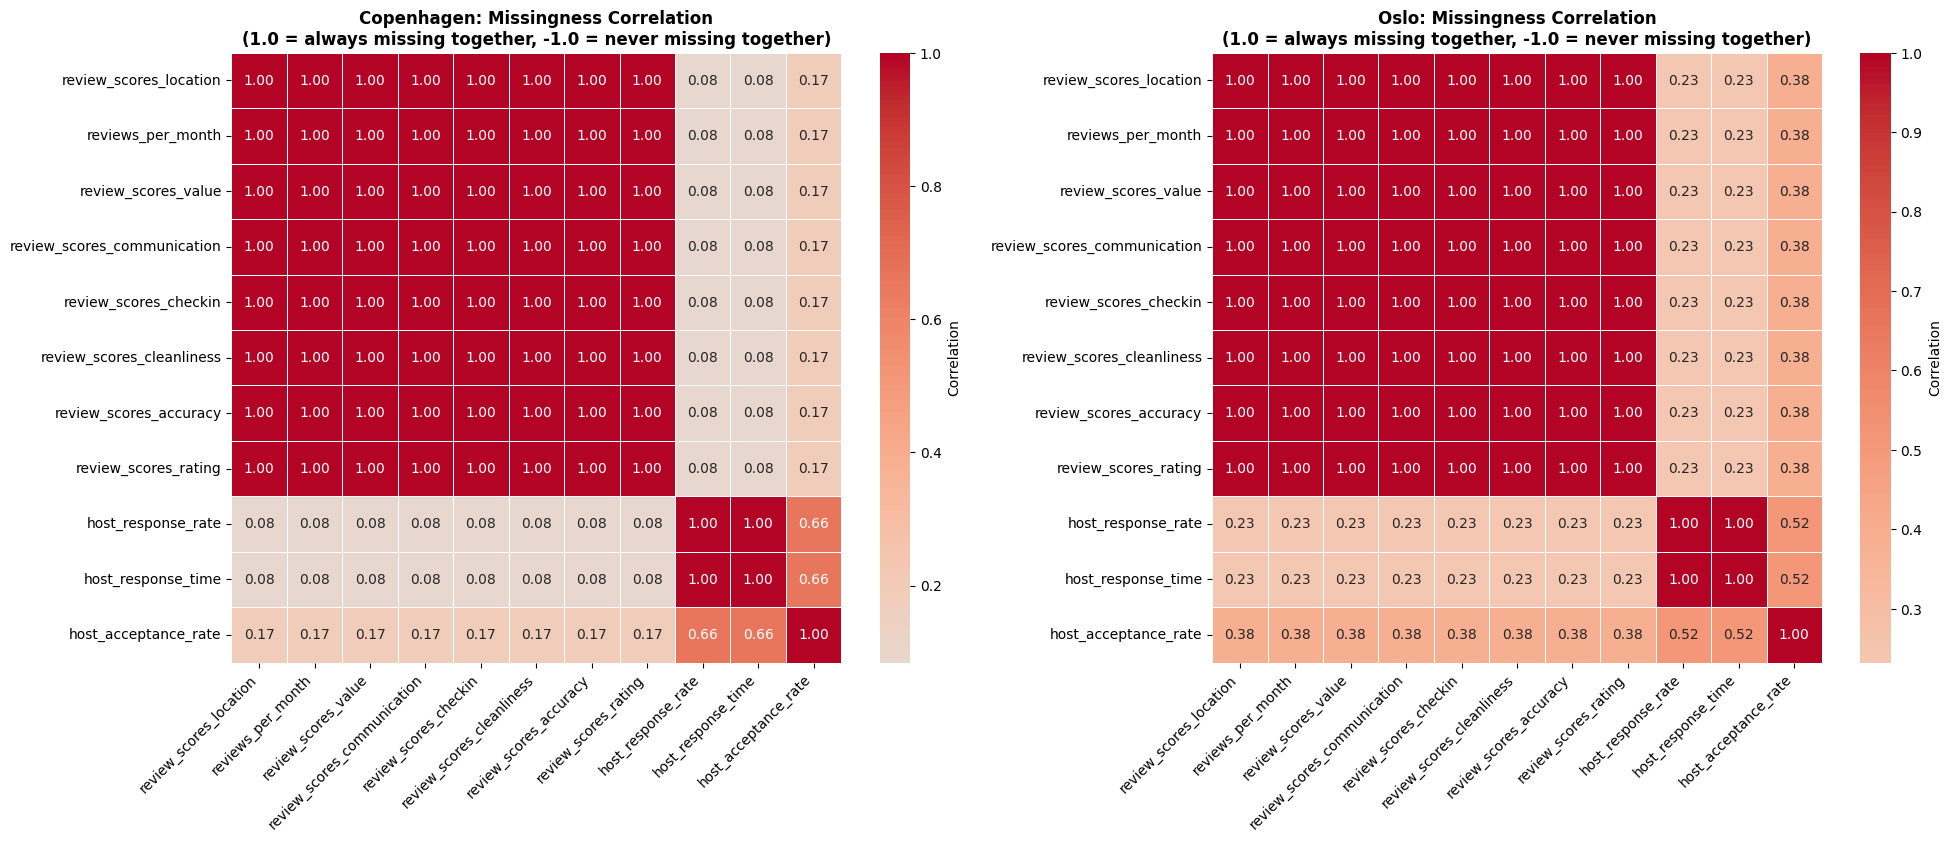

In [70]:
# Visualize missingness correlation
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Limit to top 15 columns for readability
top_missing_cols = significant_missing_cols[:15]

# Copenhagen
sns.heatmap(dk_missing_corr.loc[top_missing_cols, top_missing_cols], 
            annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Copenhagen: Missingness Correlation\n(1.0 = always missing together, -1.0 = never missing together)', 
                  fontsize=12, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Oslo
sns.heatmap(no_missing_corr.loc[top_missing_cols, top_missing_cols], 
            annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, ax=axes[1], cbar_kws={'label': 'Correlation'})
axes[1].set_title('Oslo: Missingness Correlation\n(1.0 = always missing together, -1.0 = never missing together)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [71]:
# Analysis: Rows where review_scores_location is NaN
# Show all other variables for these rows

print("="*80)
print("ANALYSIS: ROWS WHERE review_scores_location IS NaN")
print("="*80)

# Filter to rows with missing review_scores_location
dk_missing_location = dk_data[dk_data['review_scores_location'].isna()].copy()
no_missing_location = no_data[no_data['review_scores_location'].isna()].copy()

print(f"\nCopenhagen: {len(dk_missing_location):,} rows with missing review_scores_location ({len(dk_missing_location)/len(dk_data)*100:.1f}%)")
print(f"Oslo: {len(no_missing_location):,} rows with missing review_scores_location ({len(no_missing_location)/len(no_data)*100:.1f}%)")


ANALYSIS: ROWS WHERE review_scores_location IS NaN

Copenhagen: 2,251 rows with missing review_scores_location (16.3%)
Oslo: 1,471 rows with missing review_scores_location (16.9%)


In [72]:
# Show missing values in other columns for rows missing review_scores_location
print("\n" + "="*80)
print("MISSING VALUES IN OTHER COLUMNS (for rows missing review_scores_location)")
print("="*80)

for city_name, missing_df, full_df in [('Copenhagen', dk_missing_location, dk_data), 
                                        ('Oslo', no_missing_location, no_data)]:
    print(f"\n{city_name}:")
    print("-" * 80)
    
    # Calculate missing percentages for these specific rows
    missing_in_subset = missing_df.isnull().sum()
    missing_pct_subset = (missing_in_subset / len(missing_df) * 100).round(2)
    
    # Compare with overall missing percentages
    missing_pct_overall = (full_df.isnull().sum() / len(full_df) * 100).round(2)
    
    # Create comparison
    comparison = pd.DataFrame({
        'Missing_Count': missing_in_subset,
        'Missing_Pct_In_Subset': missing_pct_subset,
        'Missing_Pct_Overall': missing_pct_overall,
        'Difference': missing_pct_subset - missing_pct_overall
    })
    
    # Only show columns with at least some missing values
    comparison = comparison[comparison['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    
    print(f"\nColumns with missing values in rows where review_scores_location is NaN:")
    print(comparison.head(20).to_string())



MISSING VALUES IN OTHER COLUMNS (for rows missing review_scores_location)

Copenhagen:
--------------------------------------------------------------------------------

Columns with missing values in rows where review_scores_location is NaN:
                             Missing_Count  Missing_Pct_In_Subset  Missing_Pct_Overall  Difference
review_scores_location                2251                 100.00                16.28       83.72
reviews_per_month                     2250                  99.96                16.27       83.69
review_scores_value                   2250                  99.96                16.27       83.69
review_scores_communication           2250                  99.96                16.27       83.69
review_scores_checkin                 2250                  99.96                16.27       83.69
review_scores_cleanliness             2250                  99.96                16.27       83.69
review_scores_accuracy                2250                  99.9

In [73]:
# Show summary statistics for all variables in rows missing review_scores_location
print("\n" + "="*80)
print("SUMMARY STATISTICS: All Variables for Rows Missing review_scores_location")
print("="*80)

for city_name, missing_df in [('Copenhagen', dk_missing_location), ('Oslo', no_missing_location)]:
    print(f"\n{city_name} ({len(missing_df):,} rows):")
    print("="*80)
    
    # Get numeric columns
    numeric_cols = missing_df.select_dtypes(include=[np.number]).columns.tolist()
    if 'num_missing' in numeric_cols:
        numeric_cols.remove('num_missing')
    
    if len(numeric_cols) > 0:
        print("\nNumeric Variables Summary:")
        print(missing_df[numeric_cols].describe().T.round(2))
    
    # Get categorical columns
    categorical_cols = missing_df.select_dtypes(include=['object']).columns.tolist()
    if len(categorical_cols) > 0:
        print("\n\nCategorical Variables (value counts):")
        for col in categorical_cols[:10]:  # Show first 10
            print(f"\n{col}:")
            print(missing_df[col].value_counts().head(10))



SUMMARY STATISTICS: All Variables for Rows Missing review_scores_location

Copenhagen (2,251 rows):

Numeric Variables Summary:
                                               count     mean      std  \
host_total_listings_count                     2191.0    39.00   167.07   
latitude                                      2251.0    55.68     0.02   
longitude                                     2251.0    12.56     0.03   
accommodates                                  2251.0     3.39     1.61   
bathrooms                                     2249.0     1.13     0.38   
bedrooms                                      2250.0     1.66     0.90   
beds                                          2251.0     1.84     1.18   
price_local                                   2251.0  1509.23  2031.38   
maximum_nights                                2251.0   248.76   278.66   
minimum_minimum_nights                        2251.0     4.88    16.46   
maximum_minimum_nights                        2251.0     

In [74]:
# Compare: Rows with vs without review_scores_location
# This shows if there are systematic differences

print("\n" + "="*80)
print("COMPARISON: Rows WITH vs WITHOUT review_scores_location")
print("="*80)

for city_name, city_data in [('Copenhagen', dk_data), ('Oslo', no_data)]:
    print(f"\n{city_name}:")
    print("-" * 80)
    
    has_location = city_data[city_data['review_scores_location'].notna()]
    missing_location = city_data[city_data['review_scores_location'].isna()]
    
    print(f"\nRows WITH review_scores_location: {len(has_location):,}")
    print(f"Rows WITHOUT review_scores_location: {len(missing_location):,}")
    
    # Compare key variables
    key_vars = ['number_of_reviews', 'review_scores_rating', 'reviews_per_month', 
                'host_is_superhost', 'price_local', 'accommodates']
    
    print("\nKey Variables Comparison:")
    print(f"{'Variable':<30} {'With Location':<20} {'Without Location':<20} {'Difference':<15}")
    print("-" * 85)
    
    for var in key_vars:
        if var in city_data.columns:
            with_val = has_location[var].mean() if var in has_location.select_dtypes(include=[np.number]).columns else 'N/A'
            without_val = missing_location[var].mean() if var in missing_location.select_dtypes(include=[np.number]).columns else 'N/A'
            
            if isinstance(with_val, (int, float)) and isinstance(without_val, (int, float)):
                diff = with_val - without_val
                print(f"{var:<30} {with_val:>18.2f} {without_val:>18.2f} {diff:>13.2f}")
            else:
                print(f"{var:<30} {str(with_val):<20} {str(without_val):<20}")



COMPARISON: Rows WITH vs WITHOUT review_scores_location

Copenhagen:
--------------------------------------------------------------------------------

Rows WITH review_scores_location: 11,580
Rows WITHOUT review_scores_location: 2,251

Key Variables Comparison:
Variable                       With Location        Without Location     Difference     
-------------------------------------------------------------------------------------
number_of_reviews                           25.95               0.00         25.95
review_scores_rating                         4.84               5.00         -0.16
reviews_per_month                            0.93               0.04          0.89
host_is_superhost              N/A                  N/A                 
price_local                               1400.14            1509.23       -109.09
accommodates                                 3.41               3.39          0.01

Oslo:
-------------------------------------------------------------------

In [75]:
# Show actual data sample for rows missing review_scores_location
print("\n" + "="*80)
print("SAMPLE DATA: First 10 rows where review_scores_location is NaN")
print("="*80)

for city_name, missing_df in [('Copenhagen', dk_missing_location), ('Oslo', no_missing_location)]:
    print(f"\n{city_name}:")
    print("-" * 80)
    
    # Show all columns for these rows
    sample = missing_df.head(10)
    
    # Display with all columns visible
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', 50)
    
    print(sample.to_string())
    
    # Reset display options
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.max_colwidth')



SAMPLE DATA: First 10 rows where review_scores_location is NaN

Copenhagen:
--------------------------------------------------------------------------------
     host_response_time host_response_rate host_acceptance_rate host_is_superhost host_listings_count  host_total_listings_count host_identity_verified     neighbourhood_cleansed   latitude  longitude    property_type        room_type  accommodates  bathrooms  bathrooms_text  bedrooms  beds  price_local minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d  review_scores_rating review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communica

In [76]:
# Check if other review scores are also missing
print("\n" + "="*80)
print("REVIEW SCORES STATUS: For rows missing review_scores_location")
print("="*80)

review_cols = [col for col in dk_data.columns if 'review_scores' in col.lower()]

for city_name, missing_df in [('Copenhagen', dk_missing_location), ('Oslo', no_missing_location)]:
    print(f"\n{city_name}:")
    print("-" * 80)
    
    for col in review_cols:
        if col in missing_df.columns:
            missing_count = missing_df[col].isna().sum()
            missing_pct = (missing_count / len(missing_df) * 100)
            print(f"  {col:40} : {missing_count:>6,} missing ({missing_pct:>5.1f}%)")
    
    # Check pattern: are ALL review scores missing?
    all_review_cols = [col for col in review_cols if col in missing_df.columns]
    if len(all_review_cols) > 0:
        all_missing = missing_df[all_review_cols].isnull().all(axis=1).sum()
        print(f"\n  Rows missing ALL review scores: {all_missing:,} ({all_missing/len(missing_df)*100:.1f}%)")



REVIEW SCORES STATUS: For rows missing review_scores_location

Copenhagen:
--------------------------------------------------------------------------------
  review_scores_rating                     :  2,250 missing (100.0%)
  review_scores_accuracy                   :  2,250 missing (100.0%)
  review_scores_cleanliness                :  2,250 missing (100.0%)
  review_scores_checkin                    :  2,250 missing (100.0%)
  review_scores_communication              :  2,250 missing (100.0%)
  review_scores_location                   :  2,251 missing (100.0%)
  review_scores_value                      :  2,250 missing (100.0%)

  Rows missing ALL review scores: 2,250 (100.0%)

Oslo:
--------------------------------------------------------------------------------
  review_scores_rating                     :  1,471 missing (100.0%)
  review_scores_accuracy                   :  1,471 missing (100.0%)
  review_scores_cleanliness                :  1,471 missing (100.0%)
  review_scores

In [77]:
# ============================================================================
# ADVANCED MISSING DATA ANALYSIS: Review Scores Missingness Pattern
# ============================================================================

print("="*80)
print("MISSING DATA MECHANISM ANALYSIS: Review Scores")
print("="*80)

# Verify the pattern: number_of_reviews = 0 -> all review scores NaN
review_cols = [col for col in dk_data.columns if 'review' in col.lower() and 'scores' in col.lower()]
review_cols = [col for col in review_cols if col != 'reviews_per_month']  # Exclude this one

print(f"\nReview score columns identified: {review_cols}")

for city_name, city_data in [('Copenhagen', dk_data), ('Oslo', no_data)]:
    print(f"\n{city_name}:")
    print("-" * 80)
    
    # Check relationship between number_of_reviews and review scores
    zero_reviews = city_data[city_data['number_of_reviews'] == 0]
    has_reviews = city_data[city_data['number_of_reviews'] > 0]
    
    print(f"\nRows with number_of_reviews = 0: {len(zero_reviews):,}")
    print(f"Rows with number_of_reviews > 0: {len(has_reviews):,}")
    
    if len(zero_reviews) > 0:
        print(f"\nFor rows with 0 reviews:")
        for col in review_cols:
            if col in city_data.columns:
                missing = zero_reviews[col].isna().sum()
                print(f"  {col:40} : {missing:>6,}/{len(zero_reviews):>6,} missing ({missing/len(zero_reviews)*100:.1f}%)")
    
    if len(has_reviews) > 0:
        print(f"\nFor rows with >0 reviews:")
        for col in review_cols:
            if col in city_data.columns:
                missing = has_reviews[col].isna().sum()
                print(f"  {col:40} : {missing:>6,}/{len(has_reviews):>6,} missing ({missing/len(has_reviews)*100:.1f}%)")
    
    # Check if missing review scores are perfectly correlated with number_of_reviews = 0
    if 'number_of_reviews' in city_data.columns:
        missing_any_review = city_data[review_cols].isnull().any(axis=1)
        zero_reviews_mask = city_data['number_of_reviews'] == 0
        
        overlap = (missing_any_review & zero_reviews_mask).sum()
        print(f"\nOverlap analysis:")
        print(f"  Rows with 0 reviews AND missing review scores: {overlap:,}")
        print(f"  Rows with 0 reviews: {zero_reviews_mask.sum():,}")
        print(f"  Rows missing any review score: {missing_any_review.sum():,}")
        if zero_reviews_mask.sum() > 0:
            print(f"  % of 0-review rows that are missing scores: {overlap/zero_reviews_mask.sum()*100:.1f}%")


MISSING DATA MECHANISM ANALYSIS: Review Scores

Review score columns identified: ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

Copenhagen:
--------------------------------------------------------------------------------

Rows with number_of_reviews = 0: 2,250
Rows with number_of_reviews > 0: 11,581

For rows with 0 reviews:
  review_scores_rating                     :  2,250/ 2,250 missing (100.0%)
  review_scores_accuracy                   :  2,250/ 2,250 missing (100.0%)
  review_scores_cleanliness                :  2,250/ 2,250 missing (100.0%)
  review_scores_checkin                    :  2,250/ 2,250 missing (100.0%)
  review_scores_communication              :  2,250/ 2,250 missing (100.0%)
  review_scores_location                   :  2,250/ 2,250 missing (100.0%)
  review_scores_value                      :  2,250/ 2,250 missing (100.0%)

F

# Advanced Statistical Methods for Handling Missing Review Scores

## Missing Data Mechanism
Based on the analysis, review scores are **Missing Not At Random (MNAR)** - they're missing because `number_of_reviews = 0`. This is a **structural missingness** pattern, not random.

## Recommended Approaches (in order of sophistication):

### 1. **Indicator Variable + Conditional Imputation**
- Create indicator: `has_reviews` (1 if number_of_reviews > 0, else 0)
- For rows with reviews but missing scores: Use imputation
- For rows without reviews: Use domain knowledge (0, neutral value, or exclude)

### 2. **Multiple Imputation (MICE)**
- Use iterative chained equations to impute missing review scores
- Accounts for uncertainty in imputed values
- Produces multiple datasets for sensitivity analysis

### 3. **Model-Based Imputation**
- Build predictive models using other features (price, property type, host info, etc.)
- Use these models to predict missing review scores
- Can incorporate uncertainty through prediction intervals

### 4. **Bayesian Approach**
- Model the joint distribution of review scores
- Use MCMC to sample from posterior distribution
- Naturally handles uncertainty

### 5. **Two-Stage Modeling**
- Stage 1: Model probability of having reviews (logistic regression)
- Stage 2: Model review scores conditional on having reviews
- Accounts for selection mechanism

### 6. **Domain-Specific Imputation**
- For listings with 0 reviews: Use neutral values (e.g., 3.0 on 1-5 scale) or 0
- For listings with reviews but missing scores: Use mean of other review scores or imputation


In [ ]:
# ============================================================================
# METHOD 1: Indicator Variable + Domain-Specific Handling
# ============================================================================

print("="*80)
print("METHOD 1: Indicator Variable + Conditional Imputation")
print("="*80)

def method1_indicator_imputation(df, review_cols):
    """
    Create indicator variable and handle missing values based on number_of_reviews
    """
    df_processed = df.copy()
    
    # Create indicator
    df_processed['has_reviews'] = (df_processed['number_of_reviews'] > 0).astype(int)
    
    # For rows with 0 reviews: Set review scores to NaN (or neutral value)
    # Option A: Keep as NaN (explicit missing)
    # Option B: Set to neutral value (e.g., 3.0 for 1-5 scale)
    # Option C: Set to 0
    
    # We'll demonstrate Option B: neutral value
    for col in review_cols:
        if col in df_processed.columns:
            # For listings with 0 reviews, set to NaN (we'll handle this in modeling)
            # For listings with reviews but missing score, use mean of other review scores
            mask_has_reviews = df_processed['number_of_reviews'] > 0
            mask_missing_score = df_processed[col].isna()
            
            # If has reviews but missing this score, try to impute from other scores
            if mask_has_reviews.sum() > 0:
                other_review_cols = [c for c in review_cols if c != col and c in df_processed.columns]
                if len(other_review_cols) > 0:
                    # Use mean of other review scores for this row
                    df_processed.loc[mask_has_reviews & mask_missing_score, col] = \
                        df_processed.loc[mask_has_reviews & mask_missing_score, other_review_cols].mean(axis=1)
    
    return df_processed

# Apply to both cities
dk_method1 = method1_indicator_imputation(dk_data.copy(), review_cols)
no_method1 = method1_indicator_imputation(no_data.copy(), review_cols)

print("\nAfter Method 1:")
print(f"Copenhagen - has_reviews indicator created")
print(f"  Rows with reviews: {(dk_method1['has_reviews'] == 1).sum():,}")
print(f"  Rows without reviews: {(dk_method1['has_reviews'] == 0).sum():,}")

# Check remaining missing values
print(f"\nRemaining missing review scores (after partial imputation):")
for col in review_cols:
    if col in dk_method1.columns:
        missing = dk_method1[col].isna().sum()
        print(f"  {col:40} : {missing:>6,}")


In [ ]:
# ============================================================================
# METHOD 2: Multiple Imputation (MICE) - Using sklearn
# ============================================================================

print("="*80)
print("METHOD 2: Multiple Imputation (MICE)")
print("="*80)

try:
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    from sklearn.ensemble import RandomForestRegressor
    
    def method2_mice_imputation(df, review_cols, n_imputations=5):
        """
        Use MICE (Multiple Imputation by Chained Equations) for review scores
        Only impute for rows that have reviews (number_of_reviews > 0)
        """
        df_processed = df.copy()
        
        # Create indicator
        df_processed['has_reviews'] = (df_processed['number_of_reviews'] > 0).astype(int)
        
        # Select features for imputation (exclude review cols themselves initially)
        feature_cols = [col for col in df_processed.select_dtypes(include=[np.number]).columns 
                       if col not in review_cols and col != 'has_reviews']
        
        # Only impute for rows with reviews
        mask_has_reviews = df_processed['number_of_reviews'] > 0
        
        if mask_has_reviews.sum() > 0:
            # Prepare data for imputation
            impute_data = df_processed.loc[mask_has_reviews, feature_cols + review_cols].copy()
            
            # Initialize MICE imputer
            imputer = IterativeImputer(
                estimator=RandomForestRegressor(n_estimators=10, random_state=42),
                max_iter=10,
                random_state=42,
                imputation_order='ascending'
            )
            
            # Impute
            imputed_data = imputer.fit_transform(impute_data[feature_cols + review_cols])
            imputed_df = pd.DataFrame(imputed_data, 
                                     columns=feature_cols + review_cols,
                                     index=impute_data.index)
            
            # Update original dataframe
            for col in review_cols:
                if col in imputed_df.columns:
                    df_processed.loc[mask_has_reviews, col] = imputed_df[col].values
        
        return df_processed
    
    # Apply MICE (this might take a while)
    print("\nApplying MICE imputation (this may take a moment)...")
    dk_method2 = method2_mice_imputation(dk_data.copy(), review_cols, n_imputations=1)
    no_method2 = method2_mice_imputation(no_data.copy(), review_cols, n_imputations=1)
    
    print("\nAfter Method 2 (MICE):")
    print("Remaining missing review scores:")
    for col in review_cols:
        if col in dk_method2.columns:
            missing = dk_method2[col].isna().sum()
            print(f"  {col:40} : {missing:>6,}")
    
except ImportError:
    print("sklearn not available or version doesn't support IterativeImputer")
    print("Install with: pip install scikit-learn")
except Exception as e:
    print(f"Error in MICE imputation: {e}")


In [ ]:
# ============================================================================
# METHOD 3: Model-Based Imputation (Random Forest)
# ============================================================================

print("="*80)
print("METHOD 3: Model-Based Imputation (Random Forest)")
print("="*80)

try:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    
    def method3_model_imputation(df, review_cols):
        """
        Build predictive models for each review score using other features
        """
        df_processed = df.copy()
        df_processed['has_reviews'] = (df_processed['number_of_reviews'] > 0).astype(int)
        
        # Select features (exclude review scores and target variable)
        feature_cols = [col for col in df_processed.select_dtypes(include=[np.number]).columns 
                       if col not in review_cols and col != 'has_reviews']
        
        # Only impute for rows with reviews
        mask_has_reviews = df_processed['number_of_reviews'] > 0
        mask_no_reviews = df_processed['number_of_reviews'] == 0
        
        for col in review_cols:
            if col not in df_processed.columns:
                continue
                
            # Get rows with and without this review score
            mask_has_score = df_processed[col].notna()
            mask_missing_score = df_processed[col].isna()
            
            # Only train if we have enough data
            if (mask_has_reviews & mask_has_score).sum() > 100:
                # Prepare training data
                train_data = df_processed[mask_has_reviews & mask_has_score].copy()
                test_data = df_processed[mask_has_reviews & mask_missing_score].copy()
                
                if len(test_data) > 0 and len(feature_cols) > 0:
                    # Prepare features (handle any remaining NaNs)
                    X_train = train_data[feature_cols].fillna(train_data[feature_cols].median())
                    y_train = train_data[col]
                    X_test = test_data[feature_cols].fillna(train_data[feature_cols].median())
                    
                    # Train model
                    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
                    model.fit(X_train, y_train)
                    
                    # Predict
                    predictions = model.predict(X_test)
                    
                    # Update dataframe
                    df_processed.loc[test_data.index, col] = predictions
                    
                    print(f"  {col:40} : Imputed {len(predictions):>6,} values")
        
        return df_processed
    
    print("\nBuilding predictive models for each review score...")
    dk_method3 = method3_model_imputation(dk_data.copy(), review_cols)
    no_method3 = method3_model_imputation(no_data.copy(), review_cols)
    
    print("\nAfter Method 3 (Model-Based):")
    print("Remaining missing review scores:")
    for col in review_cols:
        if col in dk_method3.columns:
            missing = dk_method3[col].isna().sum()
            print(f"  {col:40} : {missing:>6,}")
            
except Exception as e:
    print(f"Error in model-based imputation: {e}")
    import traceback
    traceback.print_exc()


In [ ]:
# ============================================================================
# METHOD 4: Two-Stage Approach (Heckman-style)
# ============================================================================

print("="*80)
print("METHOD 4: Two-Stage Modeling Approach")
print("="*80)

try:
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestRegressor
    
    def method4_two_stage(df, review_cols):
        """
        Stage 1: Model probability of having reviews
        Stage 2: Model review scores conditional on having reviews
        """
        df_processed = df.copy()
        
        # Stage 1: Predict has_reviews
        feature_cols = [col for col in df_processed.select_dtypes(include=[np.number]).columns 
                       if col not in review_cols]
        
        # Create target
        df_processed['has_reviews'] = (df_processed['number_of_reviews'] > 0).astype(int)
        
        # Prepare data
        X = df_processed[feature_cols].fillna(df_processed[feature_cols].median())
        y_stage1 = df_processed['has_reviews']
        
        # Train stage 1 model
        stage1_model = LogisticRegression(random_state=42, max_iter=1000)
        stage1_model.fit(X, y_stage1)
        
        # Get probability of having reviews
        prob_has_reviews = stage1_model.predict_proba(X)[:, 1]
        df_processed['prob_has_reviews'] = prob_has_reviews
        
        print(f"  Stage 1: Probability of having reviews")
        print(f"    Mean probability: {prob_has_reviews.mean():.3f}")
        print(f"    Actual has_reviews rate: {y_stage1.mean():.3f}")
        
        # Stage 2: For rows with reviews, impute missing scores
        mask_has_reviews = df_processed['number_of_reviews'] > 0
        
        for col in review_cols:
            if col not in df_processed.columns:
                continue
            
            mask_has_score = df_processed[col].notna()
            mask_missing_score = df_processed[col].isna()
            
            if (mask_has_reviews & mask_has_score).sum() > 50:
                # Train model on rows with scores
                train_data = df_processed[mask_has_reviews & mask_has_score].copy()
                test_data = df_processed[mask_has_reviews & mask_missing_score].copy()
                
                if len(test_data) > 0:
                    # Include prob_has_reviews as feature
                    X_train = train_data[feature_cols + ['prob_has_reviews']].fillna(
                        train_data[feature_cols + ['prob_has_reviews']].median())
                    y_train = train_data[col]
                    X_test = test_data[feature_cols + ['prob_has_reviews']].fillna(
                        train_data[feature_cols + ['prob_has_reviews']].median())
                    
                    # Train stage 2 model
                    stage2_model = RandomForestRegressor(n_estimators=50, random_state=42)
                    stage2_model.fit(X_train, y_train)
                    
                    # Predict
                    predictions = stage2_model.predict(X_test)
                    df_processed.loc[test_data.index, col] = predictions
                    
                    print(f"  Stage 2: {col:40} - Imputed {len(predictions):>6,} values")
        
        return df_processed
    
    print("\nApplying two-stage modeling approach...")
    dk_method4 = method4_two_stage(dk_data.copy(), review_cols)
    no_method4 = method4_two_stage(no_data.copy(), review_cols)
    
    print("\nAfter Method 4 (Two-Stage):")
    print("Remaining missing review scores:")
    for col in review_cols:
        if col in dk_method4.columns:
            missing = dk_method4[col].isna().sum()
            print(f"  {col:40} : {missing:>6,}")
            
except Exception as e:
    print(f"Error in two-stage modeling: {e}")
    import traceback
    traceback.print_exc()


In [ ]:
# ============================================================================
# METHOD 5: Domain-Specific Imputation (Recommended for this case)
# ============================================================================

print("="*80)
print("METHOD 5: Domain-Specific Imputation (Recommended)")
print("="*80)

def method5_domain_specific(df, review_cols, strategy='neutral'):
    """
    Domain-specific handling based on number_of_reviews
    
    Strategies:
    - 'neutral': Set to neutral value (3.0 for 1-5 scale) for 0-review listings
    - 'zero': Set to 0 for 0-review listings
    - 'nan': Keep as NaN (explicit missing)
    - 'conditional_mean': Use mean of other review scores if available
    """
    df_processed = df.copy()
    df_processed['has_reviews'] = (df_processed['number_of_reviews'] > 0).astype(int)
    
    mask_zero_reviews = df_processed['number_of_reviews'] == 0
    mask_has_reviews = df_processed['number_of_reviews'] > 0
    
    for col in review_cols:
        if col not in df_processed.columns:
            continue
        
        # For listings with 0 reviews
        if strategy == 'neutral':
            # Set to neutral value (assuming 1-5 scale, neutral is 3.0)
            df_processed.loc[mask_zero_reviews, col] = 3.0
        elif strategy == 'zero':
            df_processed.loc[mask_zero_reviews, col] = 0.0
        elif strategy == 'nan':
            # Keep as NaN - will need to handle in modeling
            pass
        elif strategy == 'conditional_mean':
            # Use mean of other review scores if available
            other_cols = [c for c in review_cols if c != col and c in df_processed.columns]
            if len(other_cols) > 0:
                means = df_processed.loc[mask_zero_reviews, other_cols].mean(axis=1)
                df_processed.loc[mask_zero_reviews & means.notna(), col] = means[means.notna()]
                # For rows where mean is also NaN, use overall mean
                overall_mean = df_processed[col].mean()
                if pd.notna(overall_mean):
                    df_processed.loc[mask_zero_reviews & means.isna(), col] = overall_mean
        
        # For listings with reviews but missing this specific score
        # Use mean of other review scores for that listing
        mask_missing_but_has_reviews = mask_has_reviews & df_processed[col].isna()
        if mask_missing_but_has_reviews.sum() > 0:
            other_cols = [c for c in review_cols if c != col and c in df_processed.columns]
            if len(other_cols) > 0:
                # Calculate mean of other review scores for each row
                other_scores = df_processed.loc[mask_missing_but_has_reviews, other_cols]
                row_means = other_scores.mean(axis=1)
                
                # Fill with row-specific mean where available
                df_processed.loc[mask_missing_but_has_reviews & row_means.notna(), col] = \
                    row_means[mask_missing_but_has_reviews & row_means.notna()]
                
                # For rows where all other scores are also missing, use overall mean
                overall_mean = df_processed[col].mean()
                if pd.notna(overall_mean):
                    df_processed.loc[mask_missing_but_has_reviews & row_means.isna(), col] = overall_mean
    
    return df_processed

# Try different strategies
strategies = ['neutral', 'conditional_mean']
results = {}

for strategy in strategies:
    print(f"\n--- Strategy: {strategy} ---")
    dk_method5 = method5_domain_specific(dk_data.copy(), review_cols, strategy=strategy)
    no_method5 = method5_domain_specific(no_data.copy(), review_cols, strategy=strategy)
    
    results[strategy] = {
        'dk': dk_method5,
        'no': no_method5
    }
    
    print(f"Remaining missing review scores (Copenhagen):")
    for col in review_cols:
        if col in dk_method5.columns:
            missing = dk_method5[col].isna().sum()
            if missing > 0:
                print(f"  {col:40} : {missing:>6,}")


In [ ]:
# ============================================================================
# COMPARISON: Evaluate Different Methods
# ============================================================================

print("="*80)
print("COMPARISON OF IMPUTATION METHODS")
print("="*80)

# Compare distributions of imputed vs observed values
print("\nComparing imputed values to observed values for review_scores_rating:")
print("-" * 80)

# Get observed values (for rows that had reviews and scores)
observed = dk_data[dk_data['number_of_reviews'] > 0]['review_scores_rating'].dropna()

if len(observed) > 0:
    print(f"\nObserved values (n={len(observed):,}):")
    print(f"  Mean: {observed.mean():.2f}")
    print(f"  Std:  {observed.std():.2f}")
    print(f"  Min:  {observed.min():.2f}")
    print(f"  Max:  {observed.max():.2f}")
    
    # Compare with different methods
    methods_to_compare = {
        'Method 1 (Indicator)': dk_method1 if 'dk_method1' in locals() else None,
        'Method 3 (Model-Based)': dk_method3 if 'dk_method3' in locals() else None,
        'Method 5 (Neutral)': results.get('neutral', {}).get('dk') if 'results' in locals() else None,
    }
    
    for method_name, method_df in methods_to_compare.items():
        if method_df is not None and 'review_scores_rating' in method_df.columns:
            # Get originally missing values that were imputed
            originally_missing = dk_data['review_scores_rating'].isna()
            if originally_missing.sum() > 0:
                imputed = method_df.loc[originally_missing, 'review_scores_rating']
                if len(imputed) > 0 and imputed.notna().sum() > 0:
                    imputed_clean = imputed.dropna()
                    print(f"\n{method_name} - Imputed values (n={len(imputed_clean):,}):")
                    print(f"  Mean: {imputed_clean.mean():.2f}")
                    print(f"  Std:  {imputed_clean.std():.2f}")
                    print(f"  Min:  {imputed_clean.min():.2f}")
                    print(f"  Max:  {imputed_clean.max():.2f}")
                    
                    # Statistical test: Are distributions similar?
                    from scipy import stats
                    if len(imputed_clean) > 30 and len(observed) > 30:
                        ks_stat, p_value = stats.ks_2samp(observed, imputed_clean)
                        print(f"  KS test p-value: {p_value:.4f} ({'Similar' if p_value > 0.05 else 'Different'} distributions)")


# Recommendations for Advanced Stats Course

## Best Approach: **Method 5 (Domain-Specific) with Indicator Variable**

### Why?
1. **Theoretically Sound**: Missingness is structural (no reviews = no scores), not random
2. **Transparent**: Clear handling strategy that's easy to explain
3. **Flexible**: Can test different strategies (neutral, zero, conditional mean)
4. **Maintains Information**: Indicator variable preserves information about missingness mechanism

### Implementation:
1. Create `has_reviews` indicator (1 if number_of_reviews > 0, else 0)
2. For listings with 0 reviews: Use neutral value (3.0) or keep as NaN with indicator
3. For listings with reviews but missing scores: Use mean of other review scores or model-based imputation
4. Include `has_reviews` as a feature in your models

### Alternative for Maximum Sophistication: **Method 4 (Two-Stage)**
- More advanced, accounts for selection mechanism
- Good for demonstrating advanced statistical methods
- Can use Heckman correction or similar techniques

### For Sensitivity Analysis:
- Try multiple methods and compare results
- Use MICE to generate multiple imputed datasets
- Report results across different imputation strategies


In [ ]:
# ============================================================================
# FINAL RECOMMENDED IMPLEMENTATION
# ============================================================================

print("="*80)
print("FINAL RECOMMENDED IMPLEMENTATION")
print("="*80)

def recommended_imputation(df, review_cols):
    """
    Recommended approach: Domain-specific with indicator variable
    """
    df_processed = df.copy()
    
    # Step 1: Create indicator variable
    df_processed['has_reviews'] = (df_processed['number_of_reviews'] > 0).astype(int)
    
    # Step 2: Handle missing review scores
    mask_zero_reviews = df_processed['number_of_reviews'] == 0
    mask_has_reviews = df_processed['number_of_reviews'] > 0
    
    for col in review_cols:
        if col not in df_processed.columns:
            continue
        
        # For 0-review listings: Set to NaN (explicit missing, handled by indicator)
        # OR use neutral value - you can choose based on your model
        # Here we'll use NaN and let the indicator handle it
        
        # For listings with reviews but missing this score: Use mean of other scores
        mask_missing_but_has_reviews = mask_has_reviews & df_processed[col].isna()
        if mask_missing_but_has_reviews.sum() > 0:
            other_cols = [c for c in review_cols if c != col and c in df_processed.columns]
            if len(other_cols) > 0:
                # Mean of other review scores for each row
                other_scores = df_processed.loc[mask_missing_but_has_reviews, other_cols]
                row_means = other_scores.mean(axis=1)
                
                # Fill where we have other scores
                df_processed.loc[mask_missing_but_has_reviews & row_means.notna(), col] = \
                    row_means[mask_missing_but_has_reviews & row_means.notna()]
                
                # For remaining, use overall mean of this score (from listings with reviews)
                overall_mean = df_processed.loc[mask_has_reviews, col].mean()
                if pd.notna(overall_mean):
                    df_processed.loc[mask_missing_but_has_reviews & row_means.isna(), col] = overall_mean
    
    return df_processed

# Apply recommended method
dk_final = recommended_imputation(dk_data.copy(), review_cols)
no_final = recommended_imputation(no_data.copy(), review_cols)

print("\nAfter Recommended Imputation:")
print(f"\nCopenhagen:")
print(f"  has_reviews indicator: {(dk_final['has_reviews'] == 1).sum():,} with reviews, {(dk_final['has_reviews'] == 0).sum():,} without")
for col in review_cols:
    if col in dk_final.columns:
        missing = dk_final[col].isna().sum()
        print(f"  {col:40} : {missing:>6,} missing")

print(f"\nOslo:")
print(f"  has_reviews indicator: {(no_final['has_reviews'] == 1).sum():,} with reviews, {(no_final['has_reviews'] == 0).sum():,} without")
for col in review_cols:
    if col in no_final.columns:
        missing = no_final[col].isna().sum()
        print(f"  {col:40} : {missing:>6,} missing")

print("\n" + "="*80)
print("NOTE: For listings with 0 reviews, review scores remain NaN.")
print("Use 'has_reviews' indicator in your models to handle this explicitly.")
print("="*80)


In [ ]:
# Export the filtered data to CSV for easy inspection
print("\n" + "="*80)
print("EXPORTING DATA")
print("="*80)

# Save rows missing review_scores_location
dk_missing_location.to_csv('copenhagen_missing_review_location.csv', index=False)
no_missing_location.to_csv('oslo_missing_review_location.csv', index=False)

print(f"\n✅ Exported {len(dk_missing_location):,} Copenhagen rows to 'copenhagen_missing_review_location.csv'")
print(f"✅ Exported {len(no_missing_location):,} Oslo rows to 'oslo_missing_review_location.csv'")
print("\nThese files contain all variables for rows where review_scores_location is NaN")
